<a href="https://colab.research.google.com/github/gunisha30/machinelearning/blob/master/audioanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install pyAudioAnalysis
#!pip install pydub
!pip install librosa

In [0]:
import librosa


In [0]:
from __future__ import print_function
import os
import glob
import aifc
import numpy
import eyed3
import ntpath
import shutil
import numpy as np
from pydub import AudioSegment

def read_audio_generic(path):
    """
    Function to read audio files with the following extensions
    [".mp3", ".wav", ".au", ".ogg"]
    """
    sampling_rate = -1
    signal = np.array([])
    try:
        audiofile = AudioSegment.from_file(path)
        data = np.array([])
        if audiofile.sample_width == 2:
            data = numpy.fromstring(audiofile._data, numpy.int16)
        elif audiofile.sample_width == 4:
            data = numpy.fromstring(audiofile._data, numpy.int32)

        if data.size > 0:
            sampling_rate = audiofile.frame_rate
            temp_signal = []
            for chn in list(range(audiofile.channels)):
                temp_signal.append(data[chn::audiofile.channels])
            signal = numpy.array(temp_signal).T
    except:
        print("Error: file not found or other I/O error. (DECODING FAILED)")
    return (sampling_rate, signal)

a,b=read_audio_generic('C:\\Users\\hp1\\Downloads\\Aajanachle.mp3')

a=np.array([[[1,2,3,4],[1,2,6,8]],[[5,6,7,8],[8,9,9,8]]])
print(a.shape) #this will give output 2,2,4

Error: file not found or other I/O error. (DECODING FAILED)


28000 8000


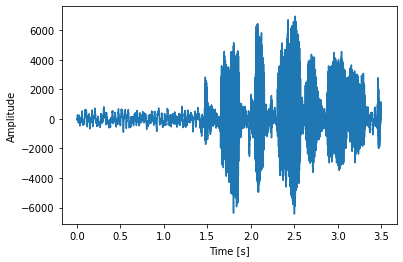

In [2]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import os
import sys
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
os.chdir('/content/drive/My Drive/awarathon')
samplerate, signal = scipy.io.wavfile.read("audio1.wav") 
signal = signal[0:int(3.5 * samplerate)] #to take first 3.5 seconds of the audio 
print(signal.size,samplerate) #size gives length of array
#length = signal.shape[0] / samplerate
length=signal.size/samplerate #this gives length of audio
#print(signal.shape[0]) #same result as size
time = np.linspace(0, length, signal.size)
plt.plot(time, signal)
#plt.plot(time, signal[:, 1], label="Right channel")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
#plt.rcParams["figure.figsize"] = [16,9]
plt.show()
